In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randInt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
corr = df.corr()

<AxesSubplot:>

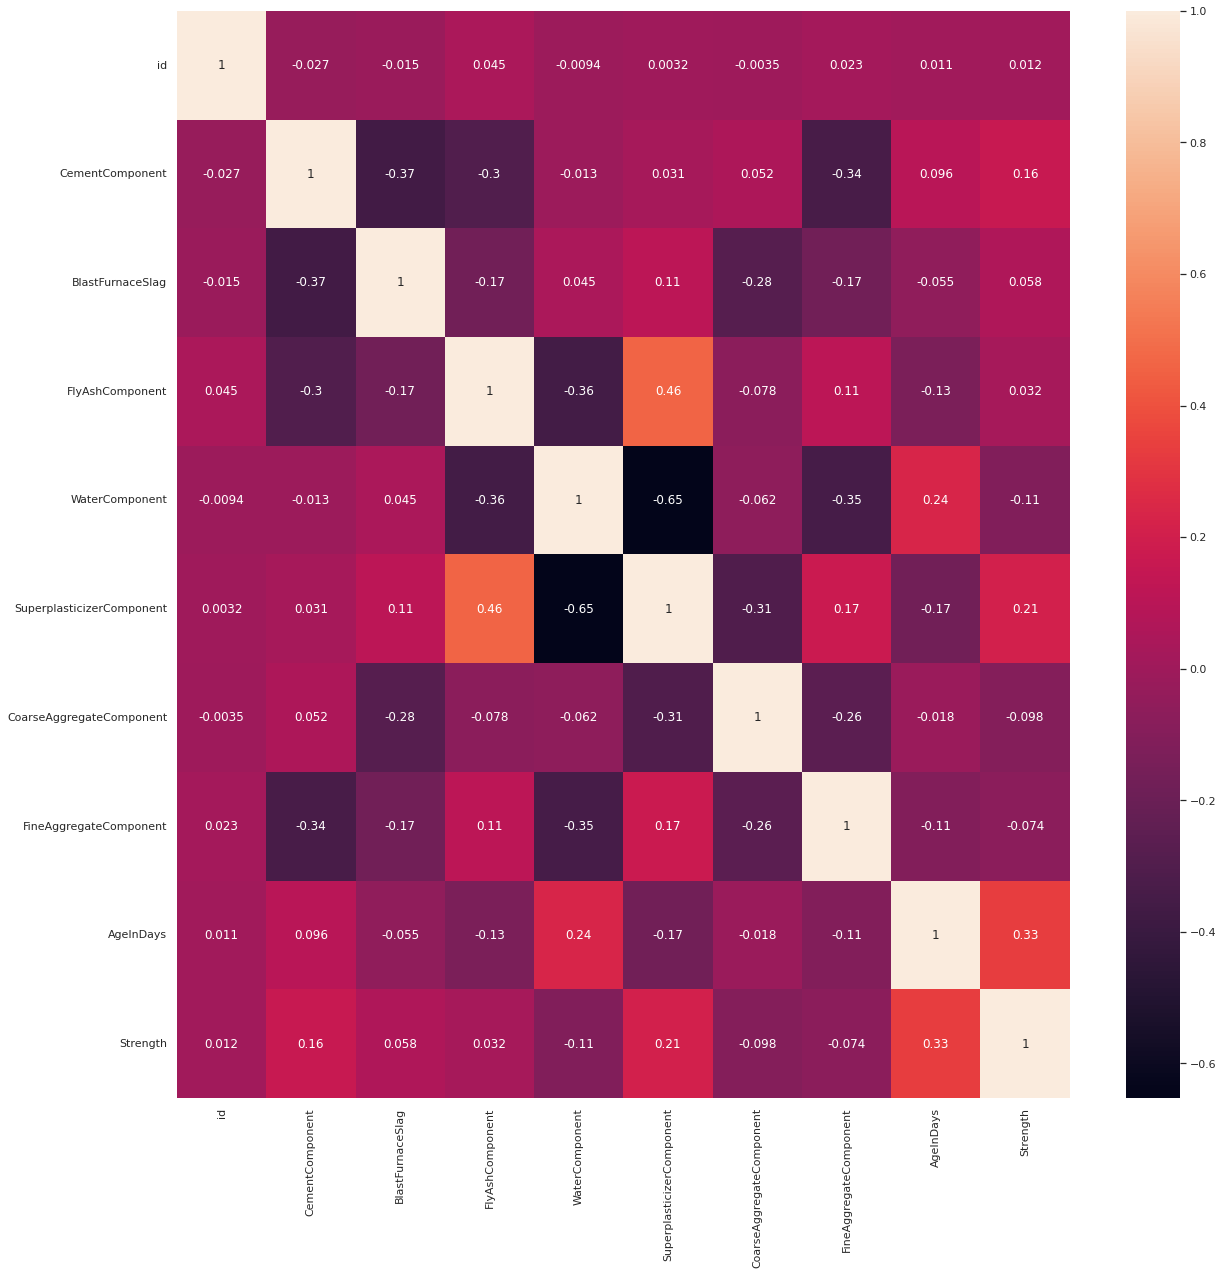

In [ ]:
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corr, annot=True)

In [ ]:
def CategoricalHandler(df):
    # Selecting all categorical features
    categorical=list(df.select_dtypes(include=['object','bool']))
    df_temp = pd.DataFrame()
    for index, value in enumerate(categorical):
        top_x = [n for n in df[value].value_counts(ascending = False).head().index]
        for label in top_x:
            df_temp[value+'_'+label] = np.where(df[value]==label, 1, 0)
            
    # Copy dataframe from 
    df = df.select_dtypes(exclude = ['object','bool'])
    df = pd.concat([df, df_temp], axis=1)
    return df
df=CategoricalHandler(df)

In [ ]:
df

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...,...
5402,5402,446.0,24.0,79.0,162.0,11.6,967.0,712.0,3,15.42
5403,5403,350.0,0.0,0.0,203.0,0.0,974.0,775.0,180,49.20
5404,5404,295.8,0.0,0.0,185.7,0.0,1076.2,759.3,28,39.30
5405,5405,376.0,93.4,0.0,162.6,11.5,955.8,662.9,28,39.61


In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

In [ ]:
df['BlastFurnaceSlag'].replace(to_replace=0.0, value = df['BlastFurnaceSlag'].mean(), inplace=True)
df['FlyAshComponent'].replace(to_replace=0.0, value = df['FlyAshComponent'].mean(), inplace=True)
df['SuperplasticizerComponent'].replace(to_replace=0.0, value = df['SuperplasticizerComponent'].mean(), inplace=True)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


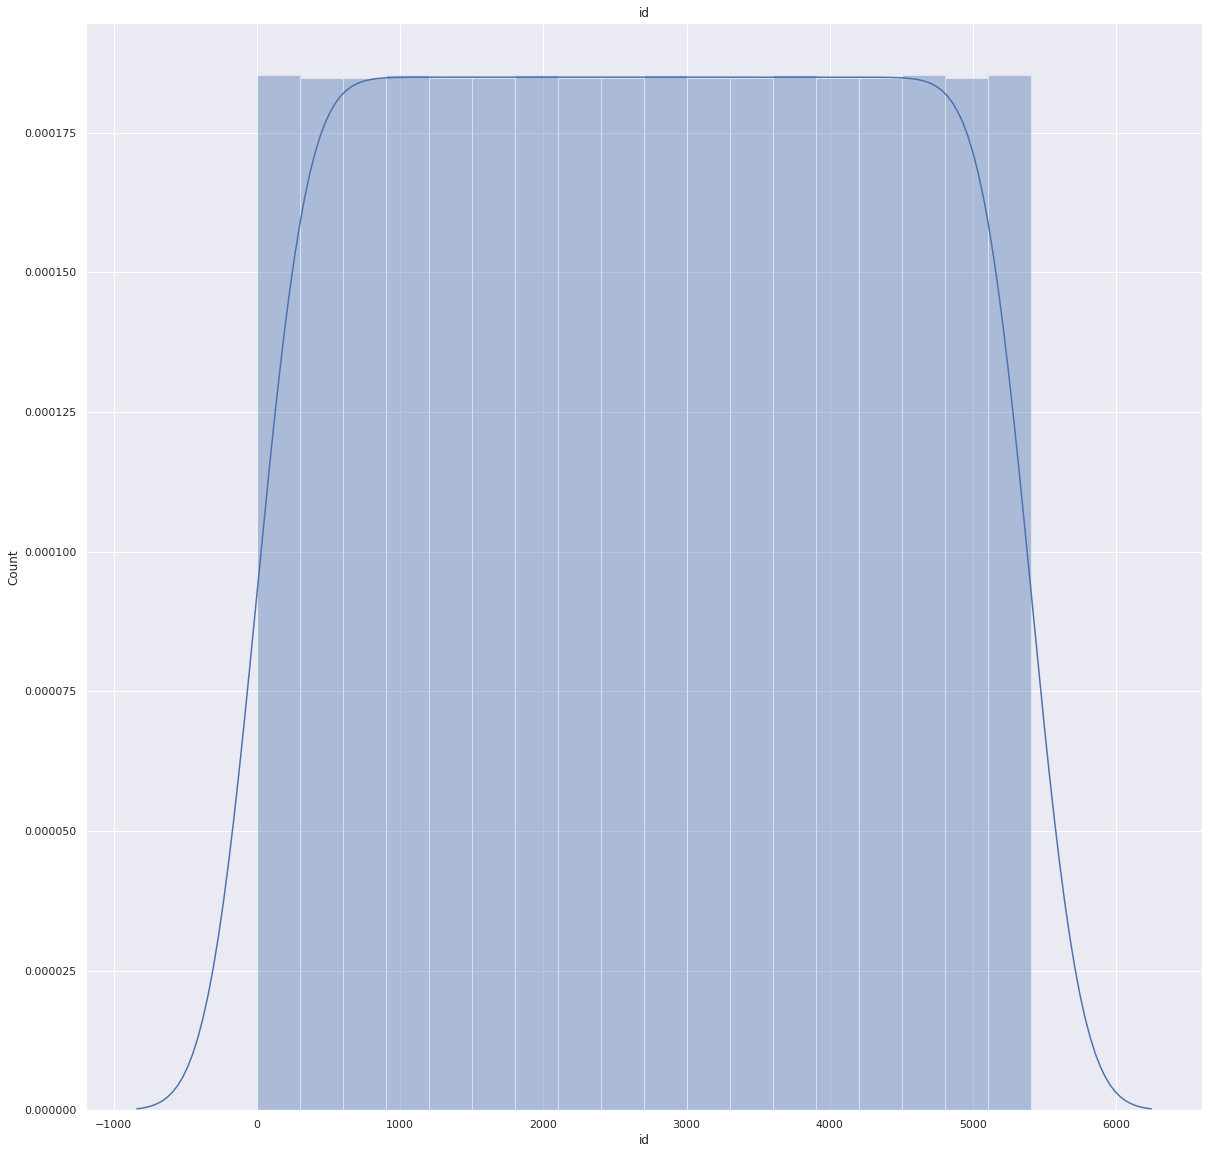

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


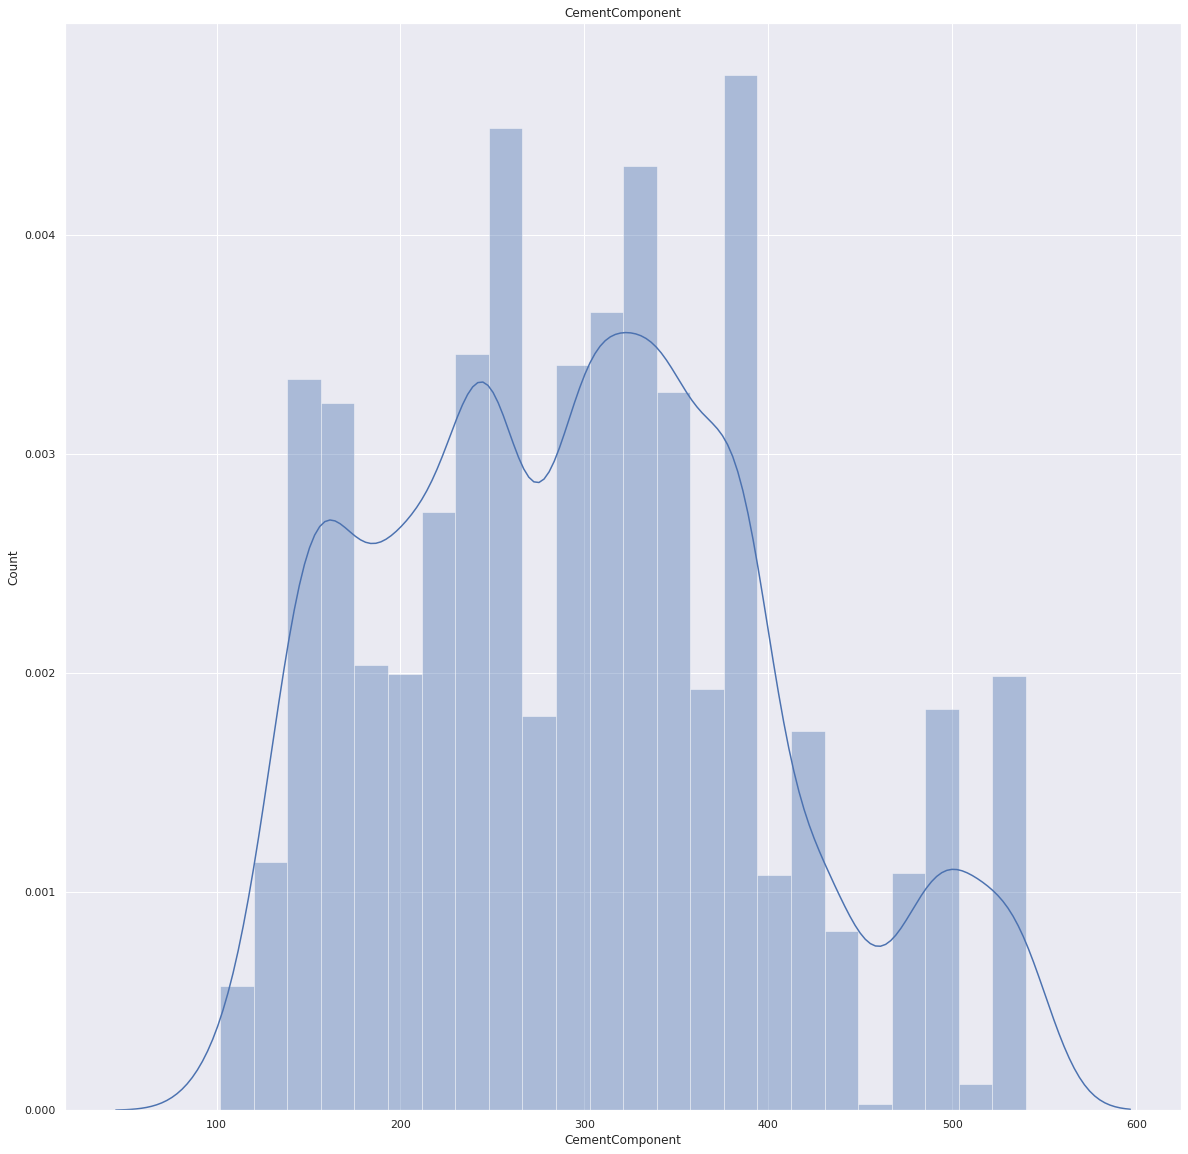

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


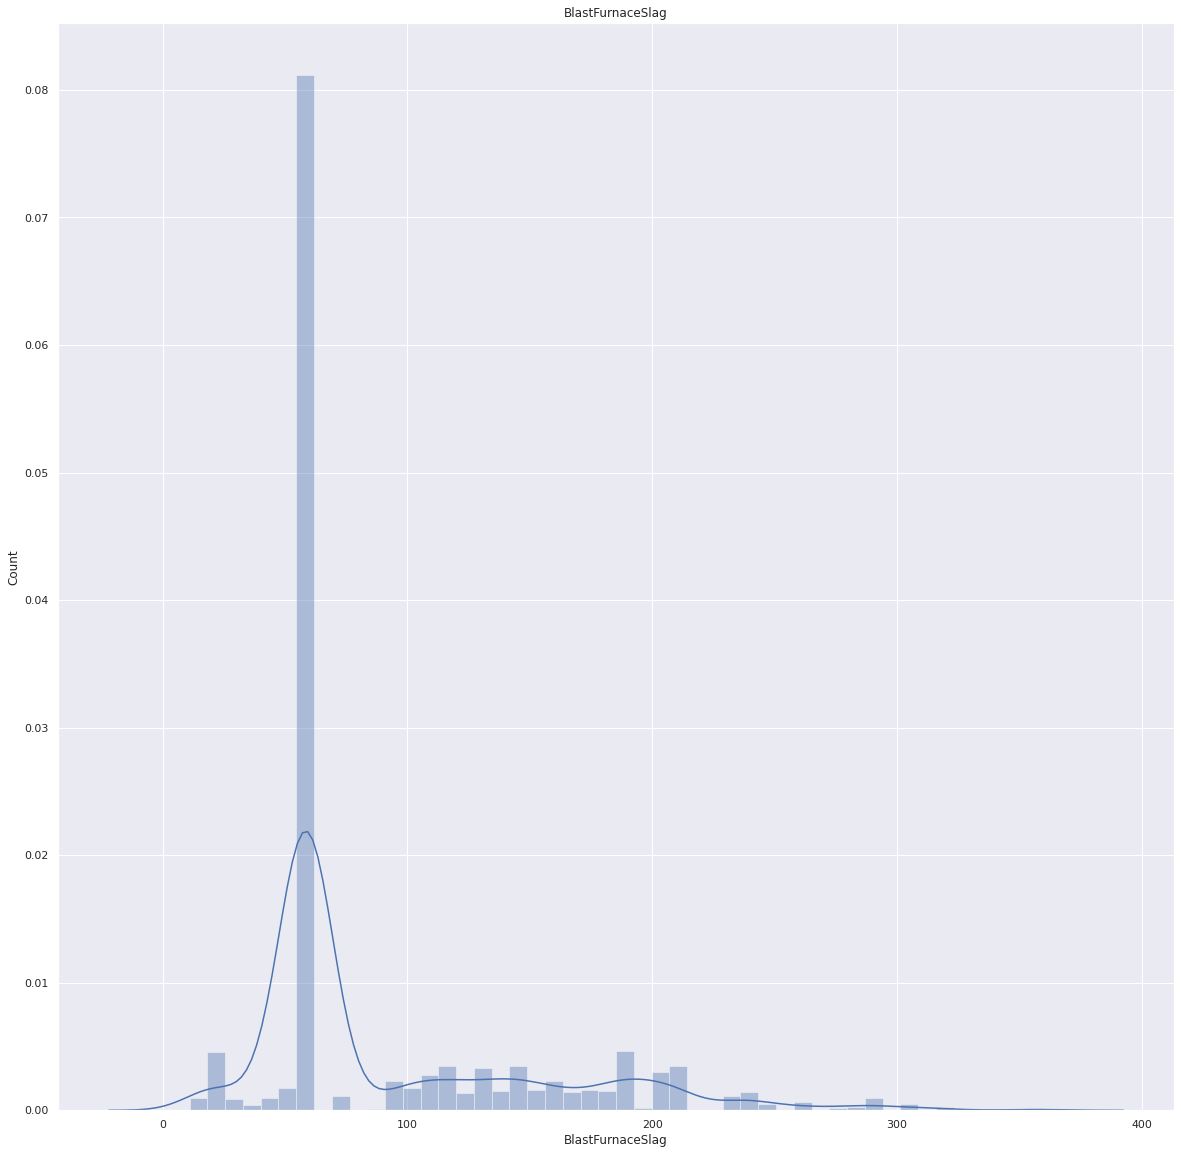

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


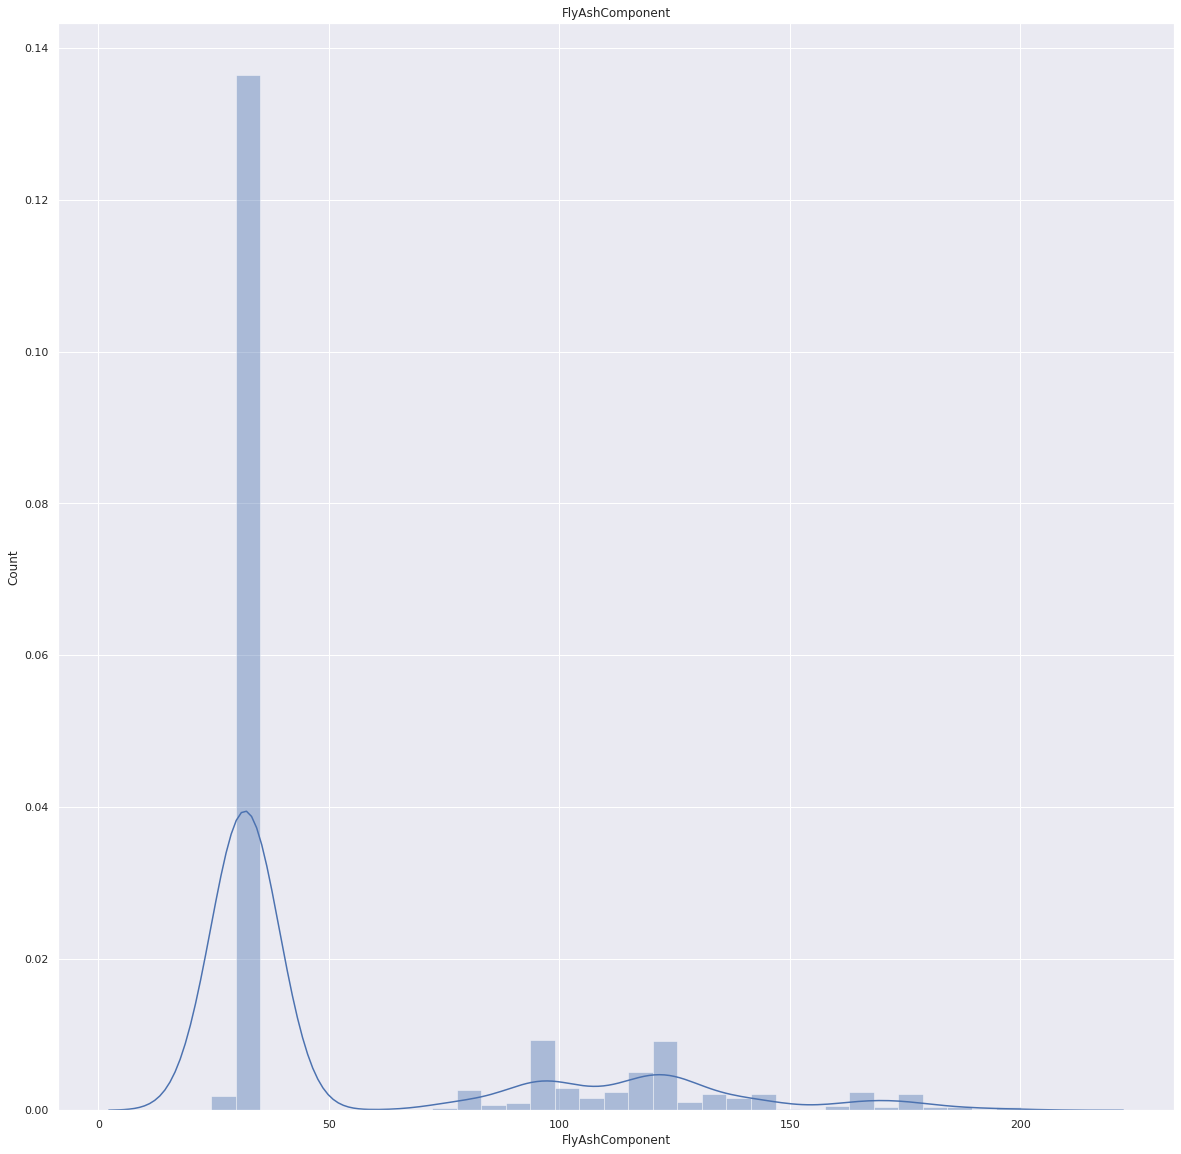

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


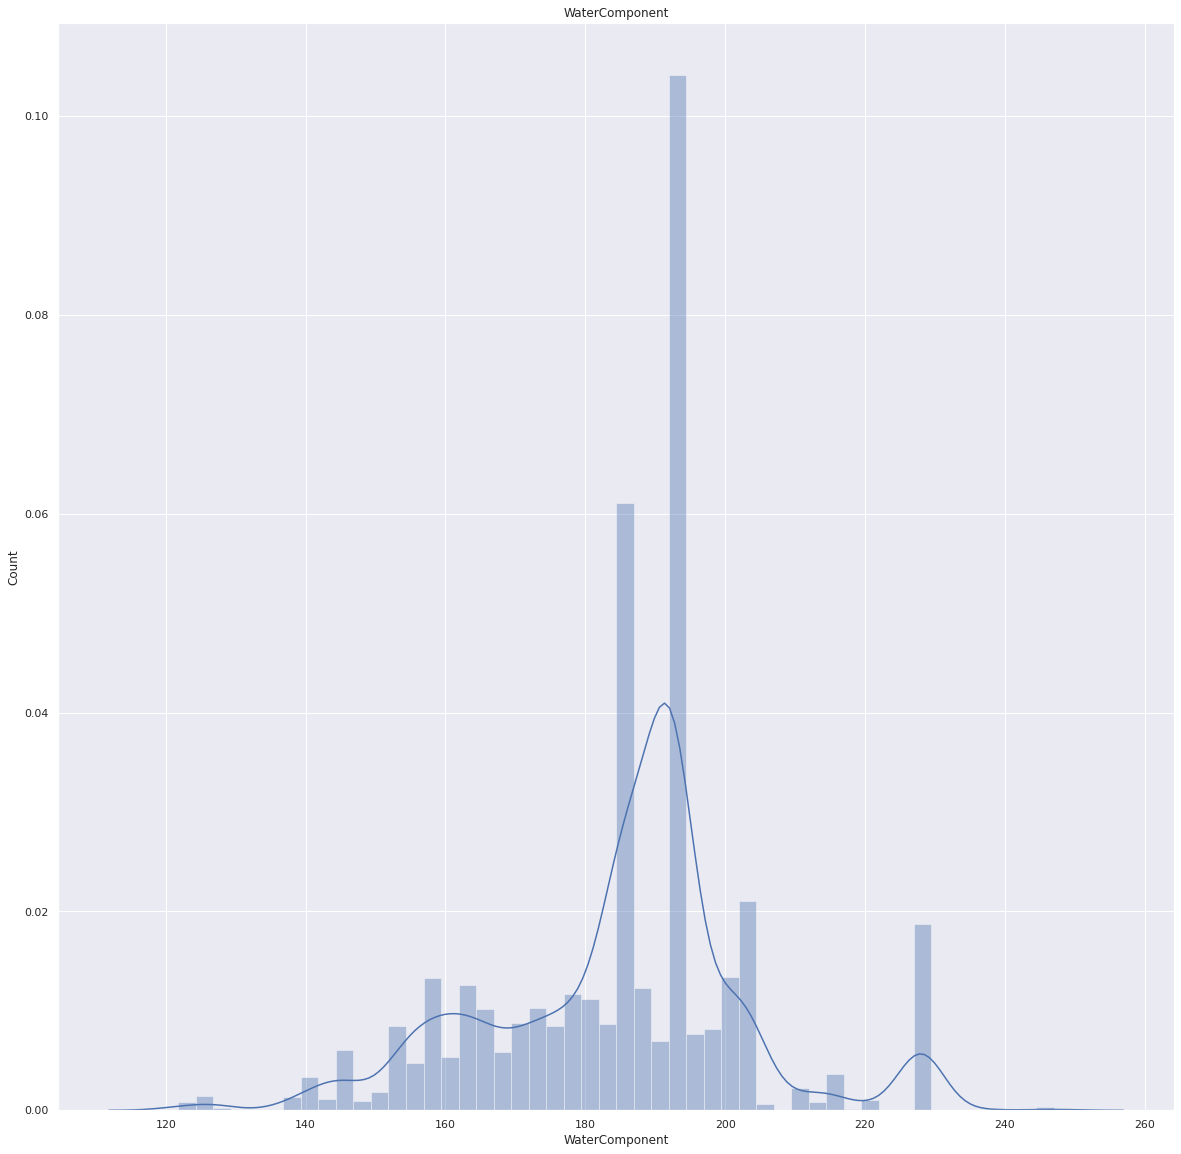

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


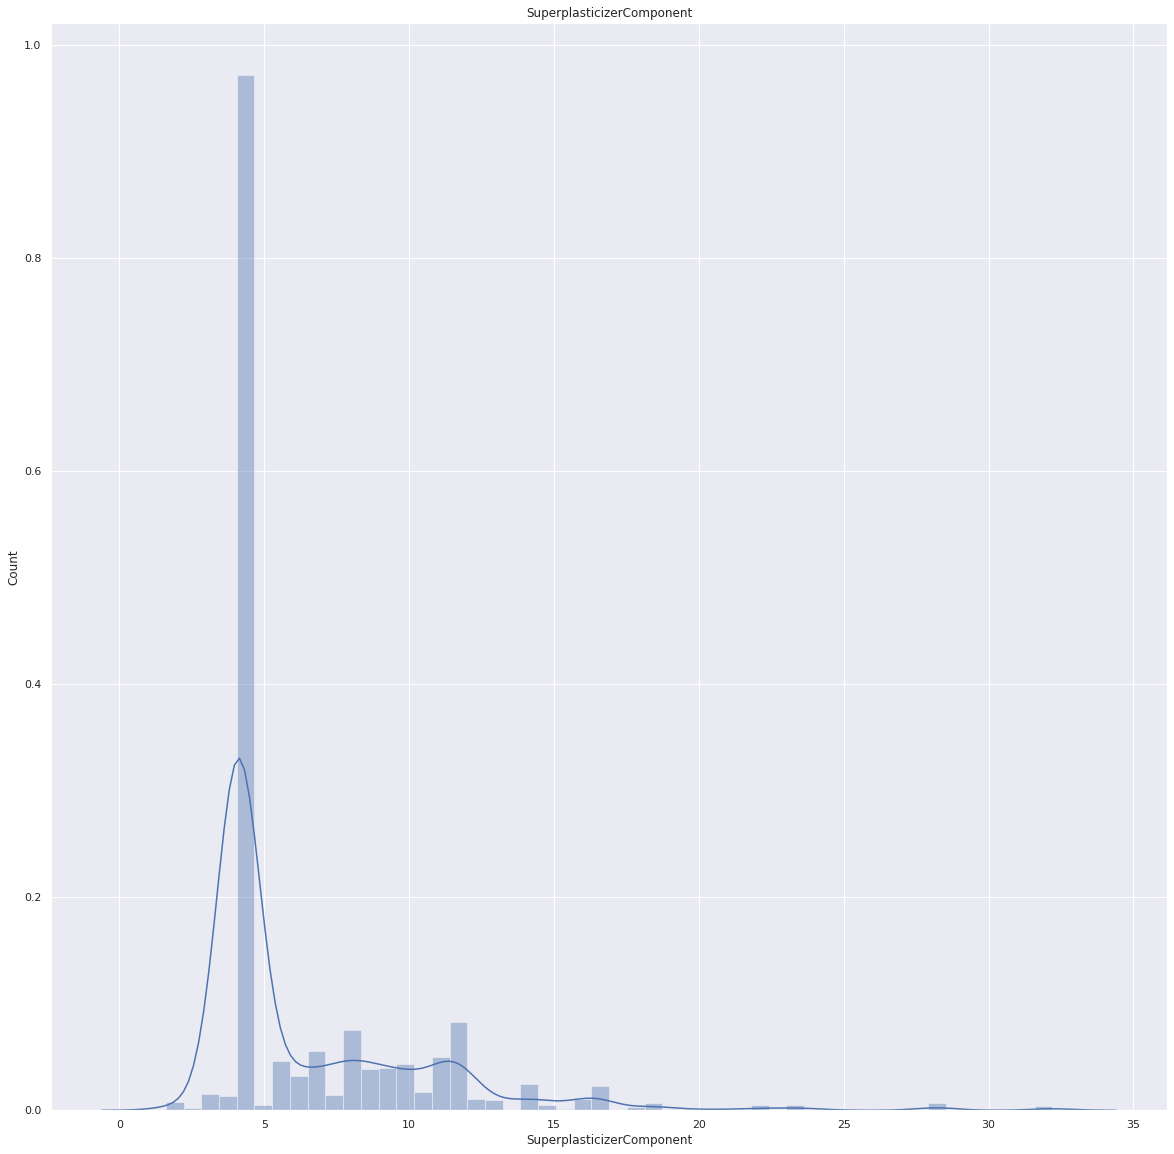

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


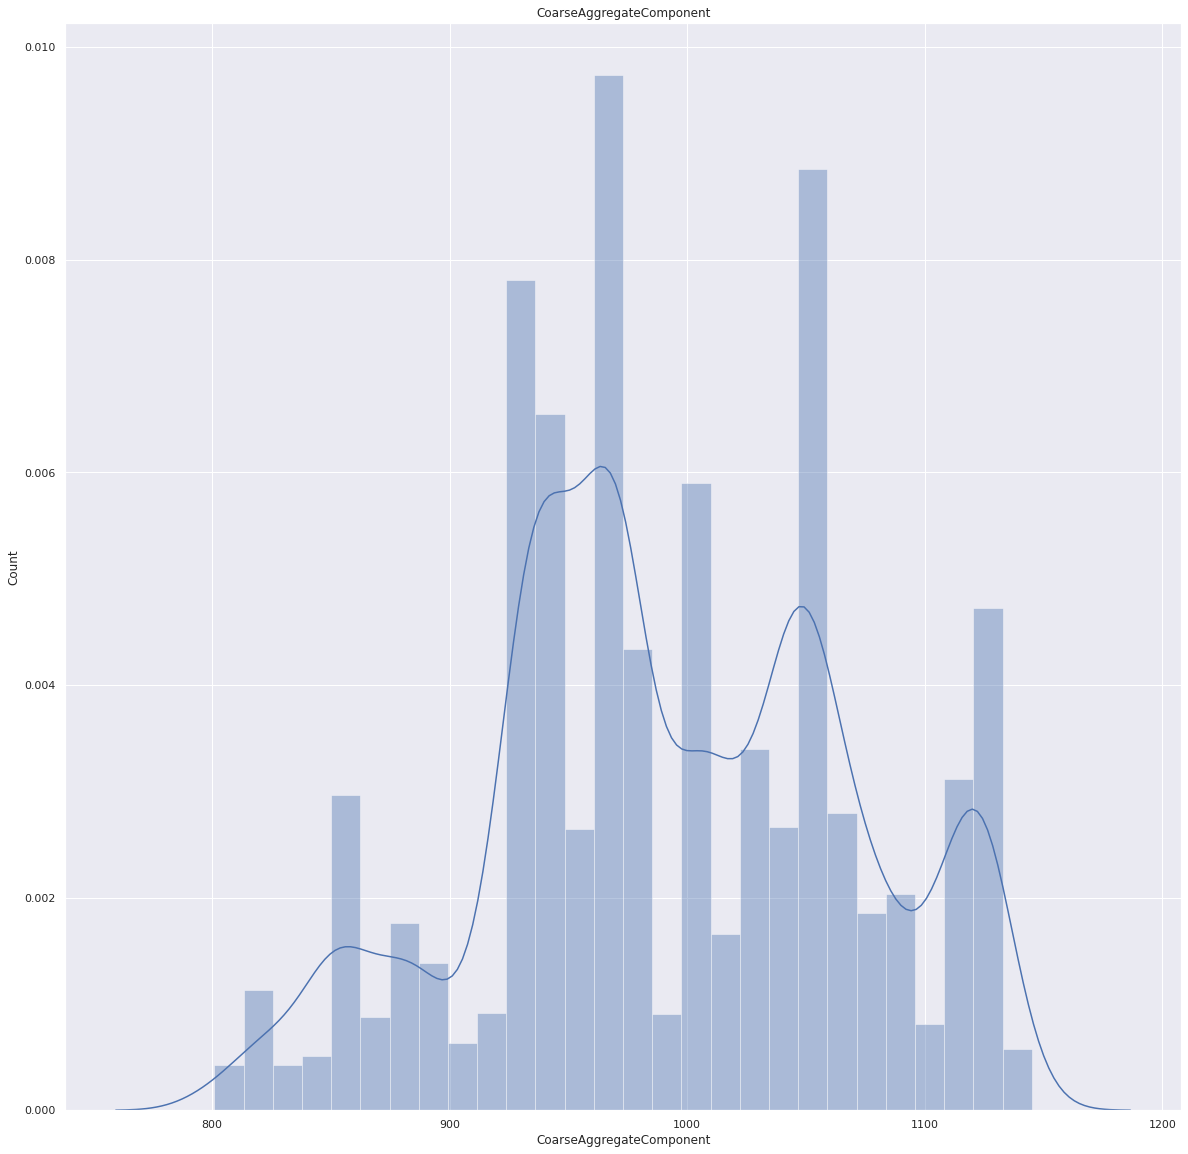

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


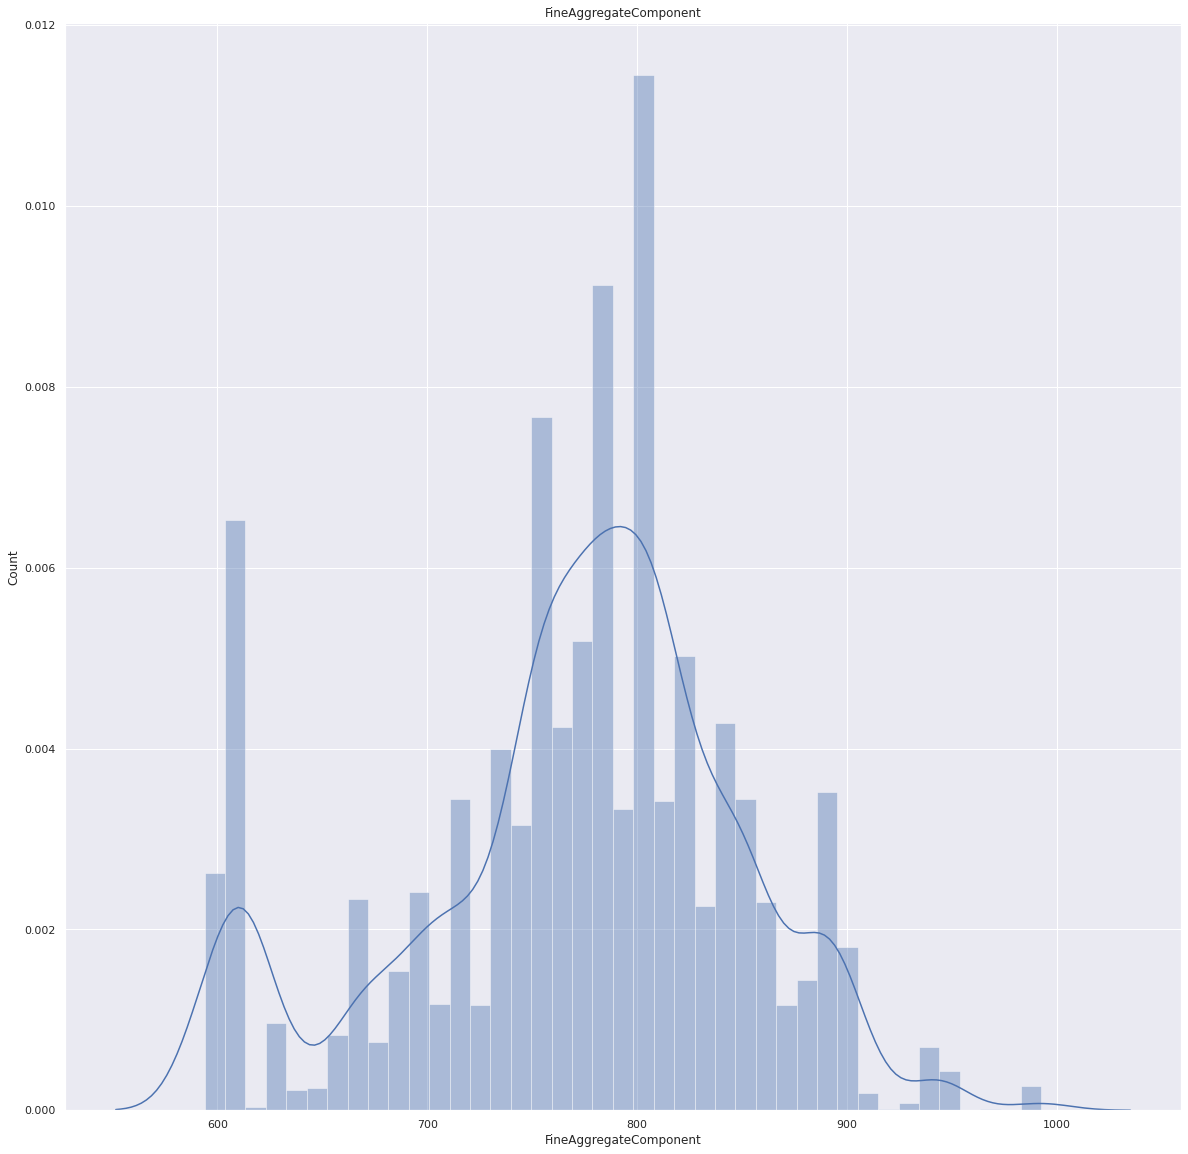

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


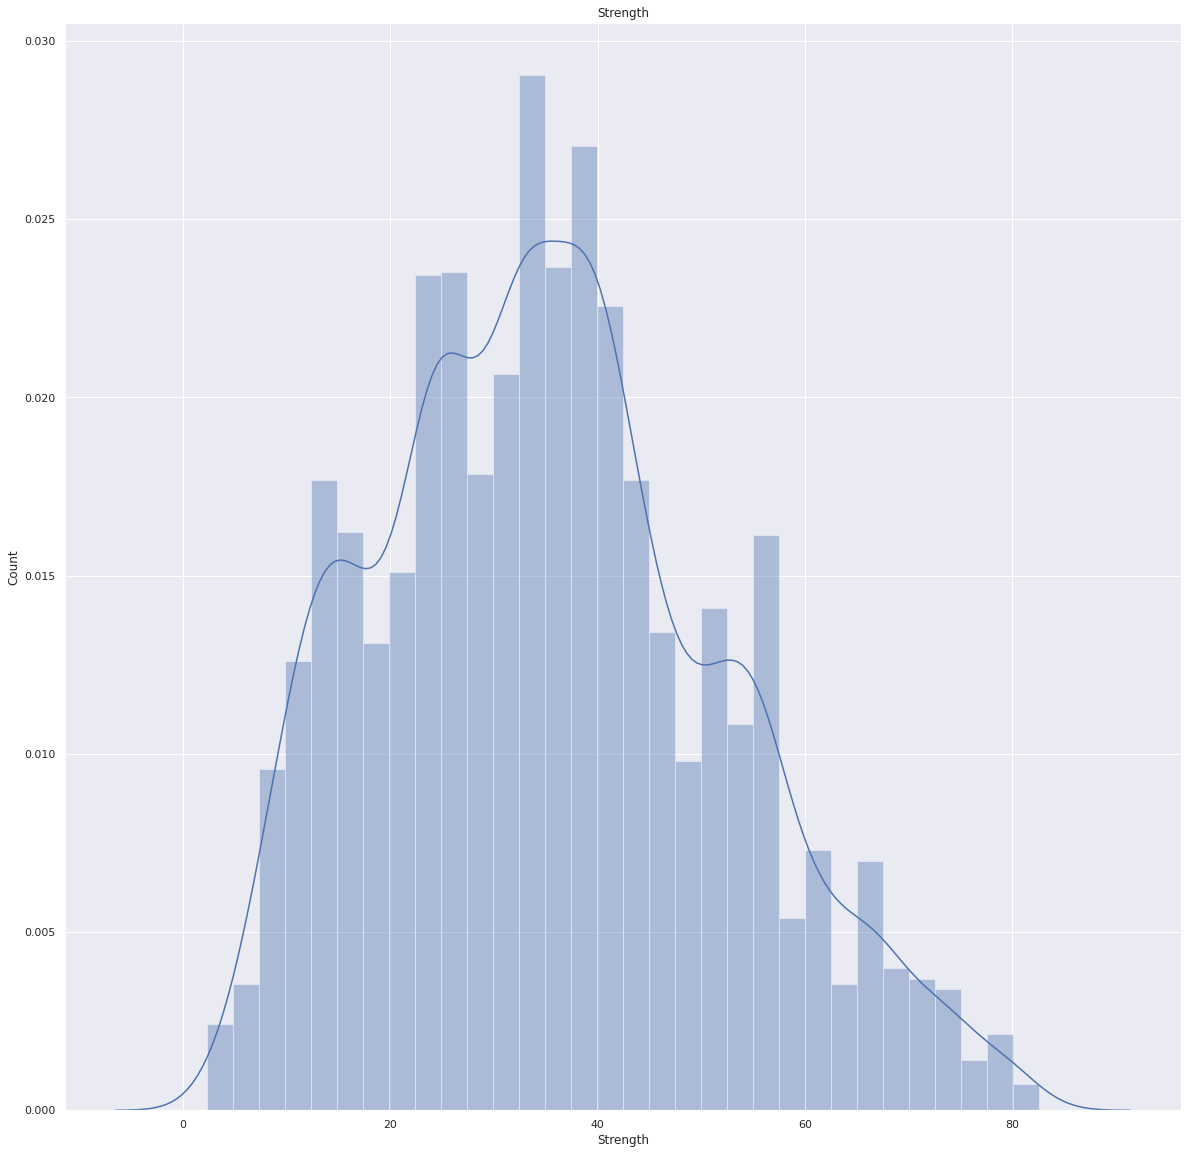

<Figure size 720x720 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(10,10))
    plt.show()

In [ ]:
df.columns

Index(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [ ]:
df_train = df.drop(columns = ["id","Strength", 'CoarseAggregateComponent'])
df_test = df["Strength"]

In [ ]:
pca = PCA(n_components=4)
components = pca.fit_transform(df_train)

In [ ]:
columns = ['pca_%i' % i for i in range(4)]
df_pca = pd.DataFrame(pca.transform(df_train), columns=columns, index=df.index)
df_pca.head()

,pca_0,pca_1,pca_2,pca_3
0,263.539632,44.547066,-90.174203,-22.146849
1,-120.748998,166.797186,-46.481919,-91.905530
2,-26.332383,2.611507,-22.659947,48.047505
3,84.008713,136.735429,289.088360,-35.313506
4,-152.262447,111.005204,32.262256,77.857924


In [ ]:
df_train = pd.concat([df_train, df_pca], axis=1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_train,df_test,test_size=0.2,random_state=25)

In [ ]:
model = RandomForestRegressor()
parameters = {
              'n_estimators' : sp_randInt(10, 100),
              'criterion' : ['squared_error', 'absolute_error', 'poisson'],
              'max_depth' : sp_randInt(1, 10),
              'min_samples_split' : sp_randInt(1, 10),
              'bootstrap' : [True,False],
              }

In [ ]:
def hypertuning_rscv(model, parameters, n_iterations,X,y):
    rdmsearch = RandomizedSearchCV(model, param_distributions=parameters, n_iter=n_iterations)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [ ]:
hypertuning_rscv(model, parameters, 43,X_train,y_train)

({'bootstrap': True,
  'criterion': 'poisson',
  'max_depth': 5,
  'min_samples_split': 5,
  'n_estimators': 67},
 0.4467603464122131)

In [ ]:
regressor1 = RandomForestRegressor(n_estimators = 10)
regressor2 = RandomForestRegressor(bootstrap = True, criterion = 'poisson', max_depth = 5,
                                   min_samples_split=5, n_estimators=67)
regressor1.fit(X_train, y_train)
regressor2.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', max_depth=5, min_samples_split=5,
                      n_estimators=67)

In [ ]:
y_pred_1 = regressor1.predict(X_test)
y_pred_2 = regressor2.predict(X_test)
#print(y_pred_1)

In [ ]:
# Accuracy values before Hyperparameter tuning
print("Before Hyperparameter tuning R^2:{:.2f}".format(r2_score(y_test,y_pred_1)))
print('Before Hyperparameter tuning RMSE:{:.2f}'.format(np.sqrt(mse(y_test,y_pred_1))))

# Accuracy values after Hyperparameter tuning
print("\nAfter Hyperparameter tuning R^2:{:.2f}".format(r2_score(y_test,y_pred_2)))
print('After Hyperparameter tuning RMSE:{:.2f}'.format(np.sqrt(mse(y_test,y_pred_2))))

Before Hyperparameter tuning R^2:0.34
Before Hyperparameter tuning RMSE:13.33

After Hyperparameter tuning R^2:0.44
After Hyperparameter tuning RMSE:12.34


In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df_test['BlastFurnaceSlag'].replace(to_replace=0.0, value = df_test['BlastFurnaceSlag'].mean(), inplace=True)
df_test['FlyAshComponent'].replace(to_replace=0.0, value = df_test['FlyAshComponent'].mean(), inplace=True)
df_test['SuperplasticizerComponent'].replace(to_replace=0.0, value = df_test['SuperplasticizerComponent'].mean(), inplace=True)

In [ ]:
pca = PCA(n_components=4)
components = pca.fit_transform(df_test)
columns = ['pca_%i' % i for i in range(4)]
df_pcat= pd.DataFrame(pca.transform(df_test), columns=columns, index=df_test.index)
df_pcat.head()

,pca_0,pca_1,pca_2,pca_3
0,1802.032711,-113.065403,-69.649674,-7.723138
1,1800.982341,1.624611,15.331204,-42.379646
2,1800.093544,-61.469018,-79.933514,-115.613087
3,1799.003777,-25.930040,-49.418907,-28.331104
4,1797.994256,-110.287261,-100.602401,-36.363396


In [ ]:
df_testu = pd.concat([df_test, df_pca], axis=1)
df_testu.columns

Index(['id', 'CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'pca_0', 'pca_1', 'pca_2', 'pca_3'],
      dtype='object')

In [ ]:
cols =['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent', 'FineAggregateComponent',
       'AgeInDays', 'pca_0', 'pca_1', 'pca_2', 'pca_3']
df_testset = df_testu[cols]
df_testset=df_testset.dropna()
y_testset = regressor2.predict(df_testset)

In [ ]:
sub = df_test['id']
output = pd.concat([sub, pd.DataFrame(y_testset, columns=['Strength'])], axis=1)
output.to_csv("Submission_cementstrength2.csv", index=False)